**Software Evolution** is the process of developing software and maintaining it over time. It involves the continuous improvement and adaptation of software systems to meet changing requirements, fix bugs, and enhance performance. Software evolution is a critical aspect of software engineering, as it ensures that software remains relevant and effective in a dynamic environment. With the rapid pace of technological advancements and changing user needs, the configuration space continuesly increases in terms of technologies and their configuration options.

In [ ]:
import json
import matplotlib.pyplot as plt
from typing import List
from collections import defaultdict


data_file = "../data/microservice_projects/piggymetrics.json"

with open(data_file, "r", encoding="utf-8") as src:
    data = json.load(src)

*How does the configuration space of open-source software projects evolve?*

/tmp/ipykernel_401140/3135775363.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


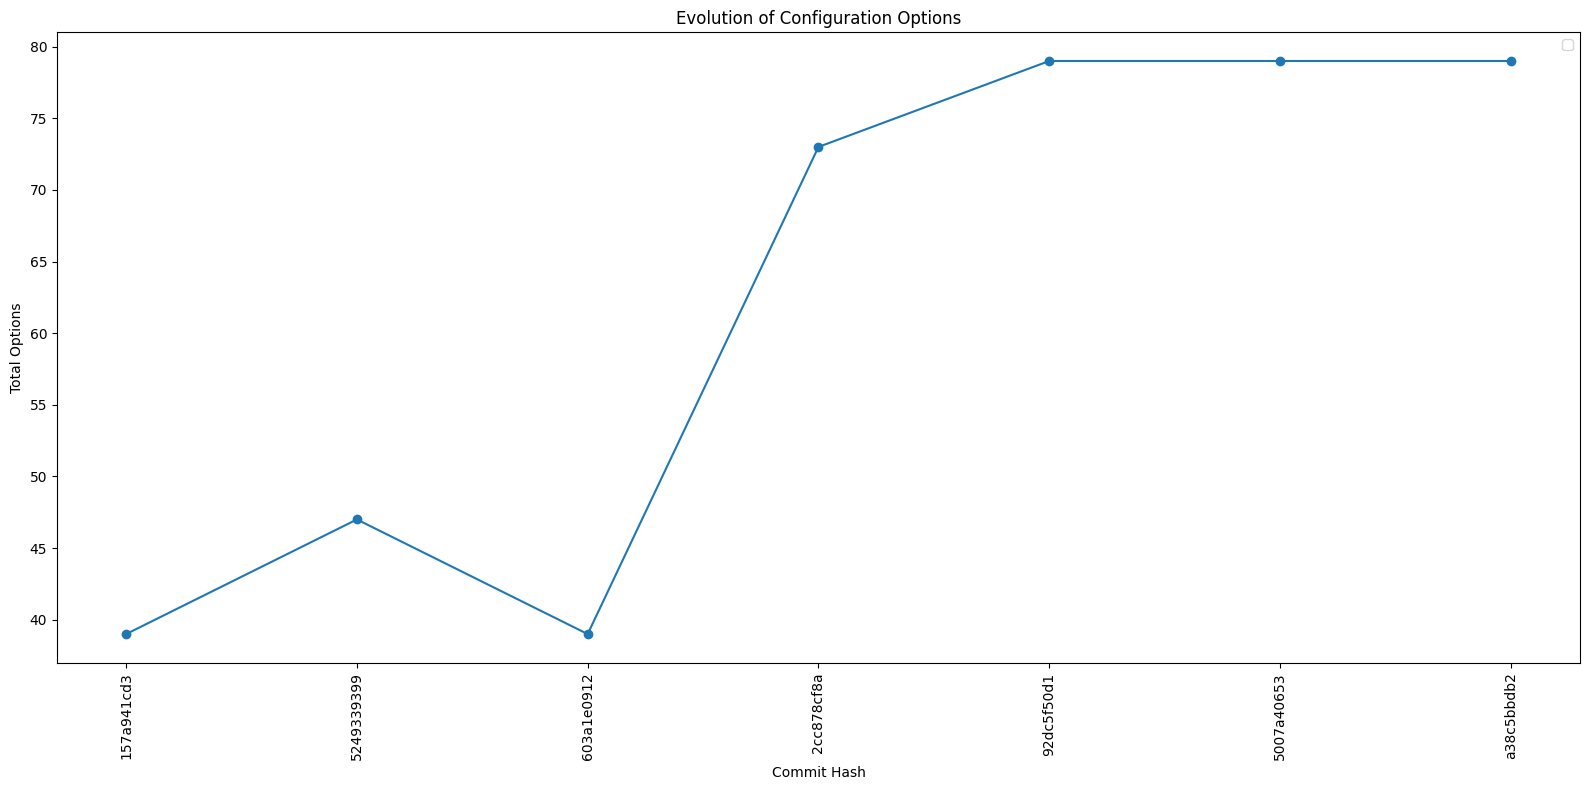

In [ ]:
def plot_option_evolution(data: List):
    last_count = 0
    commit_hashes = []
    option_counts = []

    for commit in data["commit_data"]:
        commit_hash = commit["commit_hash"]
        if commit["is_config_related"]:
            last_count = commit["network_data"]["total_options"]
        commit_hashes.append(commit_hash)
        option_counts.append(last_count)


    # Plotting
    plt.figure(figsize=(16, 8))
    plt.plot(range(len(option_counts)), option_counts, marker='o', linestyle='-')

    # Show commit hashes as x-ticks, reduce frequency to avoid clutter
    step = max(len(commit_hashes) // 20, 1)
    plt.xticks(
        ticks=range(0, len(commit_hashes), step),
        labels=[commit_hashes[i][:10] for i in range(0, len(commit_hashes), step)],
        rotation=90
    )

    plt.xlabel('Commit Hash')
    plt.ylabel('Total Options')
    plt.title('Evolution of Configuration Options')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"../data/figures/{data['project_name']}_option_evolution.png")

plot_option_evolution(data)

*How does the configuration space of technologies used to build software evolve?*

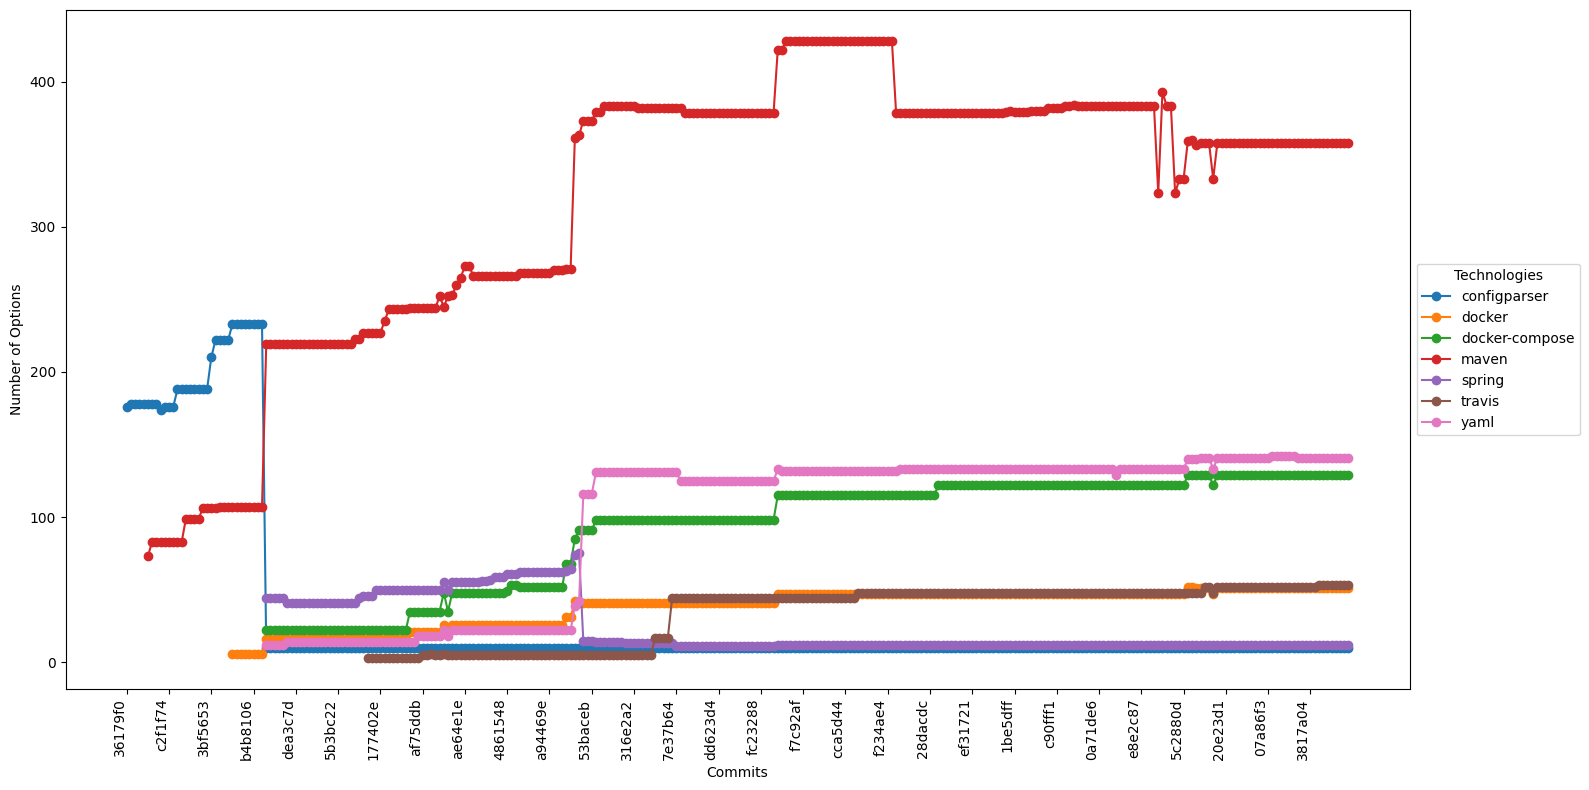

In [4]:
def plot_technology_evolution(data: List):
    concepts = set()
    concept_data = defaultdict(list)

    all_commits = data["commit_data"]
    x_ticks = [commit["commit_hash"] for commit in all_commits]

    # Initialize all concept values to None
    concept_lines = defaultdict(lambda: [None] * len(x_ticks))

    # Collect all known concepts and populate values
    for i, commit in enumerate(all_commits):
        if commit.get("is_config_related") and "network_data" in commit and "config_files_data" in commit["network_data"]:
            concept_counts = defaultdict(int)
            for config_file in commit["network_data"]["config_files_data"]:
                concept = config_file.get("concept")
                options = config_file.get("options", 0)
                if concept:
                    concepts.add(concept)
                    concept_counts[concept] += options

            for concept, count in concept_counts.items():
                concept_lines[concept][i] = count

    # Forward-fill missing values (non-config commits or missing concepts)
    for concept in concepts:
        last_value = None
        for i in range(len(x_ticks)):
            if concept_lines[concept][i] is None:
                concept_lines[concept][i] = last_value
            else:
                last_value = concept_lines[concept][i]

    # Shorten commit hashes
    shortened_x_ticks = [commit[:7] for commit in x_ticks]

    plt.figure(figsize=(16, 8))
    for concept in sorted(concepts):
        plt.plot(shortened_x_ticks, concept_lines[concept], marker="o", label=concept)
    plt.xlabel("Commits")
    plt.ylabel("Number of Options")
    plt.xticks(ticks=range(0, len(shortened_x_ticks), 10), labels=shortened_x_ticks[::10], rotation=90, ha="right")
    plt.legend(title="Technologies", loc="center left", bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.savefig(f"../data/figures/{data['project_name']}_technology_evolution.png")


plot_technology_evolution(data=data)


*How does the configuration space of configuration files evolve?*

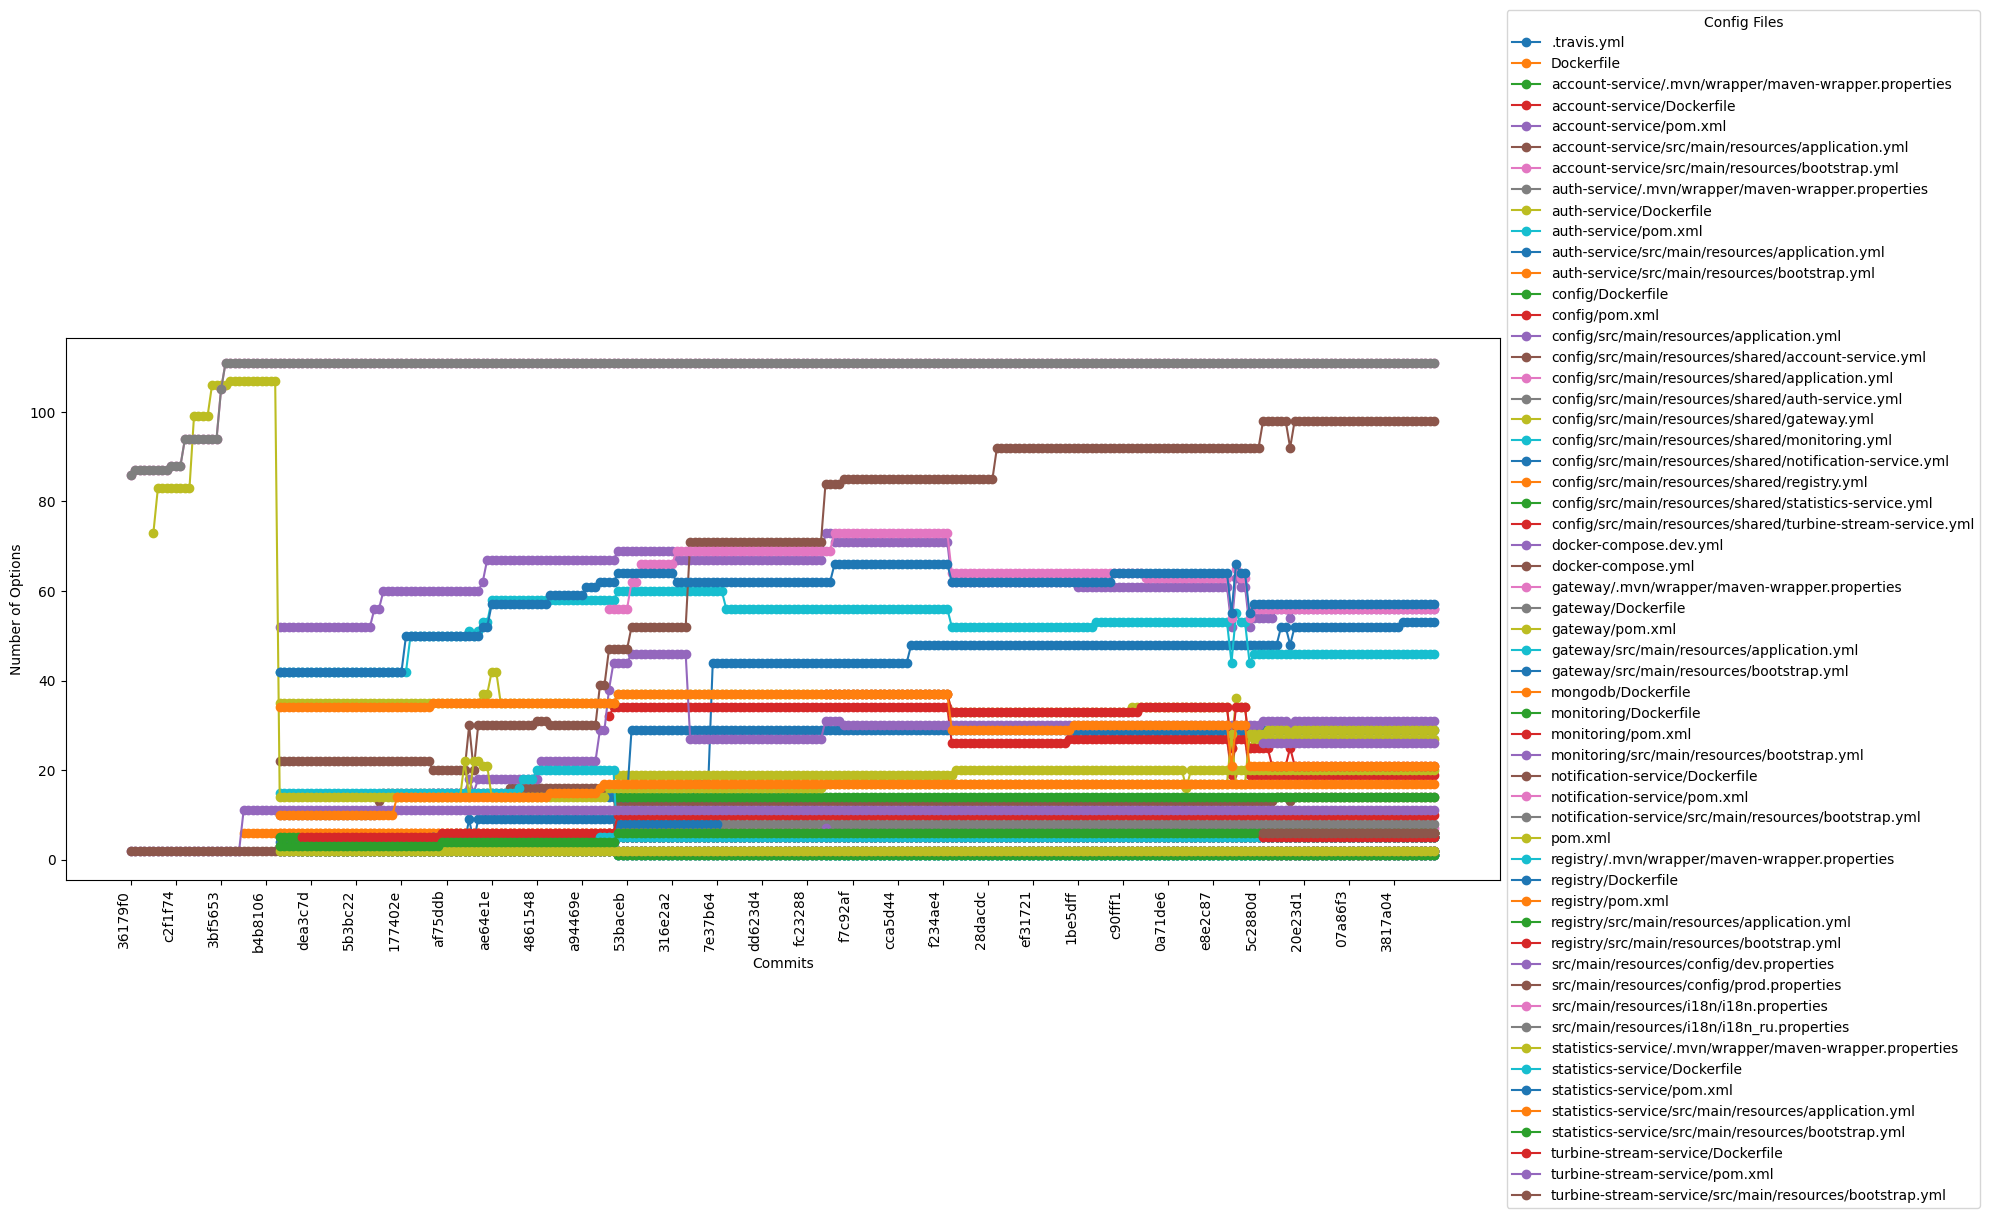

In [9]:
def plot_artifact_evolution(data: List):
    file_paths = set()
    file_lines = defaultdict(lambda: [None] * len(data["commit_data"]))
    x_ticks = [commit["commit_hash"] for commit in data["commit_data"]]

    # Step 1: Fill data per file for config-related commits
    for i, commit in enumerate(data["commit_data"]):
        if commit.get("is_config_related") and "network_data" in commit and "config_files_data" in commit["network_data"]:
            for config_file in commit["network_data"]["config_files_data"]:
                file_path = config_file.get("file_path")
                options = config_file.get("options", 0)
                if file_path:
                    file_paths.add(file_path)
                    file_lines[file_path][i] = options

    # Step 2: Forward-fill values for non-config commits or missing file entries
    for file_path in file_paths:
        last_value = None
        for i in range(len(x_ticks)):
            if file_lines[file_path][i] is None:
                file_lines[file_path][i] = last_value
            else:
                last_value = file_lines[file_path][i]

    # Step 3: Shorten commit hashes
    shortened_x_ticks = [commit[:7] for commit in x_ticks]

    # Step 4: Plot with larger size
    plt.figure(figsize=(20, 10))
    for file_path in sorted(file_paths):
        plt.plot(shortened_x_ticks, file_lines[file_path], marker="o", label=file_path)

    plt.xlabel("Commits")
    plt.ylabel("Number of Options")
    plt.xticks(ticks=range(0, len(shortened_x_ticks), 10), labels=shortened_x_ticks[::10], rotation=90, ha="right")
    plt.legend(title="Config Files", loc="center left", bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.savefig(f"../data/figures/{data['project_name']}_technology_evolution.png")

plot_artifact_evolution(data=data)